In [1]:
import os
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/Users/lb962/Downloads/ESL/GESLA/')
from src.dataload.all_datasets import open_CODEC, wave_datasets, ERA5_datasets, CMIP6_datasets
from src.visualisation.plot_variables import plot_variable_at_time, plot_variable_at_box, plot_tide_at_time
import cartopy.crs as ccrs

In [2]:
# Voor de goede orde

# Path to the tide NetCDF files
data_folder = str(sys.path[-1])

# Define the longitude and latitude range for Europe
lon_min, lon_max = -11.5, 15.0  # Longitude range for Europe
lat_min, lat_max = 48, 65.0   # Latitude range for Europe

# Tidal data

In [4]:
CODEC_datasets = open_CODEC(data_folder)

# Wave data

In [3]:
# Run these lines of code to open and store the wave datasets
def store_wave_datasets_in_globals(folder_path):
    # Load datasets from the specified folder path
    datasets = wave_datasets(folder_path)
    
    # Store datasets in the global scope
    for variable_name, dataset in datasets.items():
        # Create a variable with the same name as the variable_name and assign the dataset to it
        globals()[variable_name + '_dataset'] = dataset

store_wave_datasets_in_globals(data_folder)

# ERA5 weather

In [5]:
ERA5_dataset = ERA5_datasets(data_folder)

# CMIP mean tide data

In [3]:
CMIP6_dataset = CMIP6_datasets(data_folder, lon_min, lon_max, lat_min, lat_max)

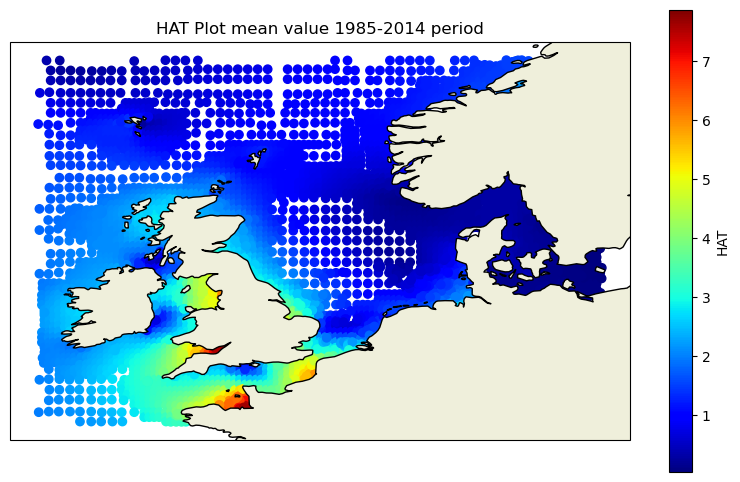

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

def plot_variable_at_location(dataset, variable_name):
    # Extract latitude, longitude, and variable values from the dataset
    lon_values = dataset['longitude'].values
    lat_values = dataset['latitude'].values
    variable_values = dataset[variable_name].values
    
    # Create a figure and axis with a specific projection
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Plot the variable based on longitude and latitude
    plt.scatter(lon_values, lat_values, c=variable_values, cmap='jet')
    
    # Add colorbar
    plt.colorbar(label=variable_name)
    
    # Add land outlines on top
    ax.add_feature(cartopy.feature.LAND, edgecolor='black', zorder=2)
    
    # Add labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'{variable_name} Plot mean value 1985-2014 period')
    
    # Show plot
    plt.show()

# Example usage
plot_variable_at_location(CMIP6_dataset, 'HAT')


# Plot all at same time

In [8]:
desired_time = '2014-01-01T00:00:00'

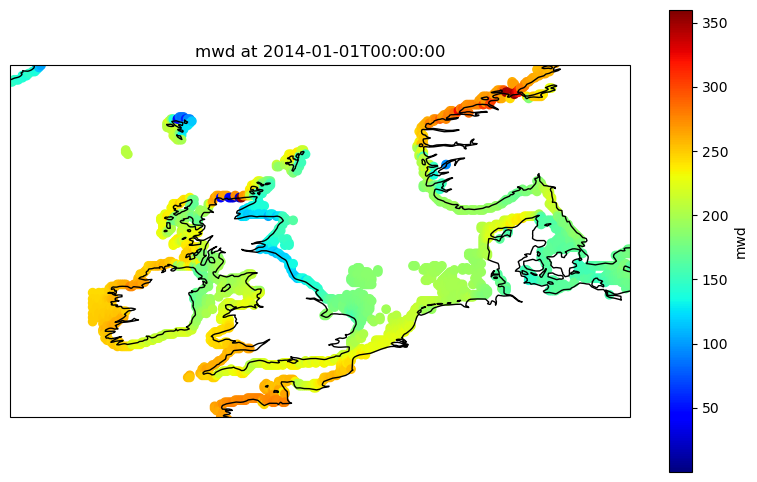

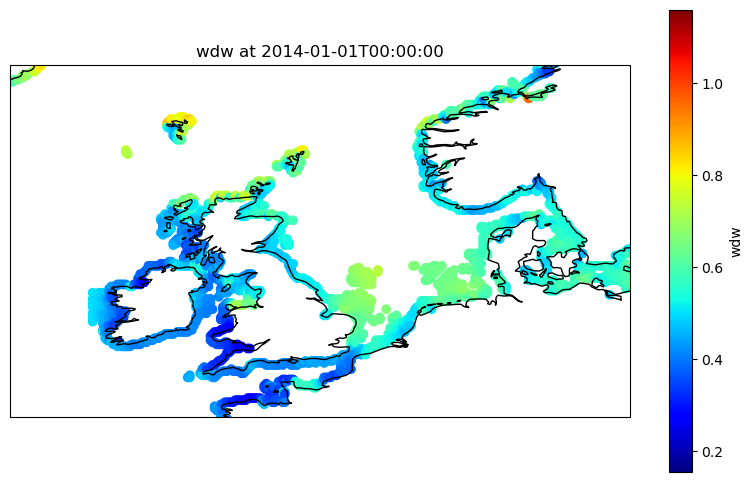

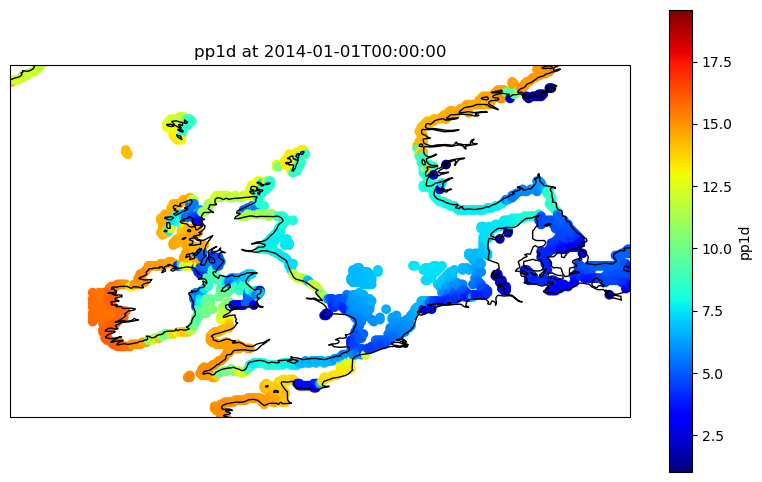

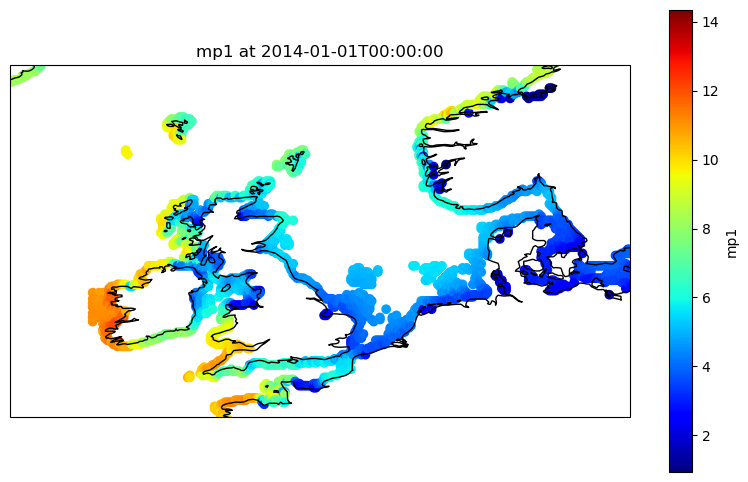

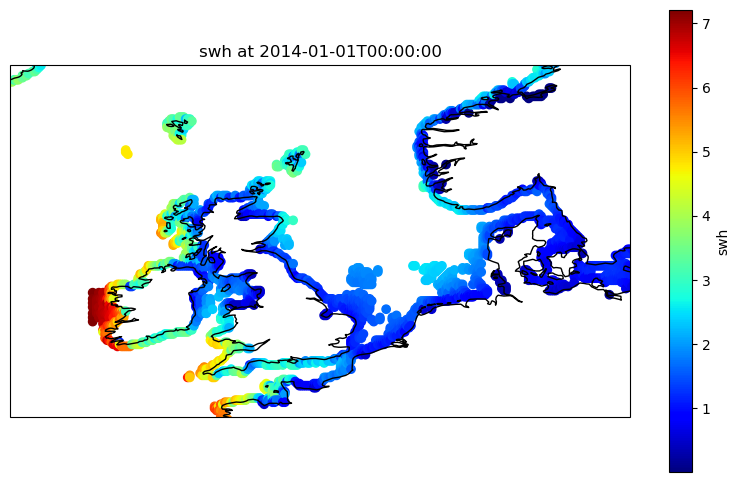

In [5]:
# List out the names of the datasets
dataset_names = [name for name in globals() if name.endswith('_dataset')]

for dataset_name in dataset_names:
    # Check if the dataset name exists in globals
    dataset = globals().get(dataset_name)
    
    # Extract variable name from the dataset name
    variable = dataset_name.split('_')[0]

    # Call the plot_variable_at_time function
    if dataset:
        plot_variable_at_box(dataset, variable, desired_time)
    else:
        print(f"Dataset {dataset_name} not found in globals.")


In [16]:
variable_data = ERA5_dataset.sel(time=desired_time)

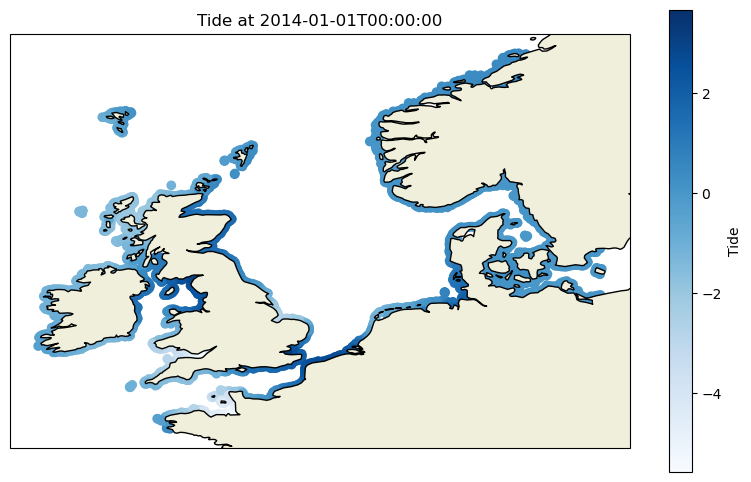

In [6]:
plot_tide_at_time(CODEC_datasets[7], desired_time)